In [27]:
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.colors as mcolors

from code_.model_activations.configs import model_cfg as cfg
from code_.eigen_analysis.tools import *
from code_.model_activations.loading import load_full_identifier

from config import CACHE, DATA, PCA_PATH, FIGURES_ADDITIONAL, RESULTS


In [52]:
import random
from pathlib import Path
from PIL import Image  # pip install pillow
import matplotlib.pyplot as plt
from loading import load_majaj_images, load_nsd_images
# --- 1. your list of image paths ---------------------------------
i = 4

dataset = 'majajhong'
if dataset == 'majajhong':
    image_paths = load_majaj_images()
elif dataset == 'naturalscenes':
    image_paths = load_nsd_images()
# --- 2. pick one at random ---------------------------------------
chosen_path = Path(random.choice(image_paths))
print(f"Chosen image: {chosen_path}")


Chosen image: /data/atlas/repo_data/majajhong/image_dicarlo_hvm-public/MQUEEN_L_rx-33.782_ry+07.980_rz-16.507_tx+00.024_ty+00.560_s+01.325_7ea2e2e4298d7555f6ad06af48eb8ff58beed4c8_256x256.png


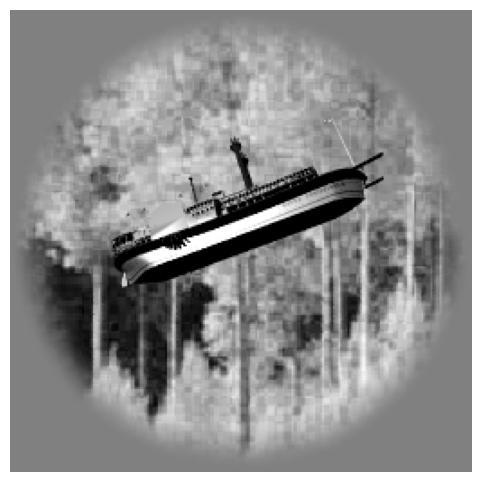

Saved copy to: /home/akazemi3/Desktop/untrained_models_of_visual_cortex/figures/additional analysis/image_4_majajhong.png.png


In [53]:
# --- 3. open & show ----------------------------------------------
img = Image.open(chosen_path)

plt.figure(figsize=(6, 6))
plt.axis("off")
plt.imshow(img)           # Jupyter / notebook / pyplot window
plt.show()

# --- 4. save a copy ----------------------------------------------
out_name  = f'image_{i}_{dataset}.png'
out_path  = Path(FIGURES_ADDITIONAL) / out_name

img.save(out_path)
print(f"Saved copy to: {out_path}")


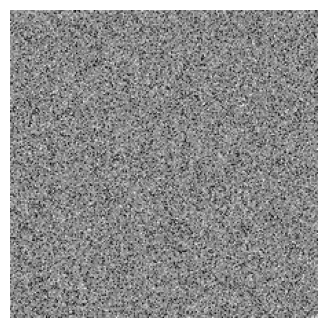

Saved copy to: /home/akazemi3/Desktop/untrained_models_of_visual_cortex/figures/additional analysis/image_4_shuffled_majajhong.png


In [56]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. load image and make sure it is 3-channel RGB
img_path = chosen_path
img      = Image.open(img_path).convert("RGB")

# 2. get a writable NumPy array
arr      = np.asarray(img).copy()          # write-enabled
h, w, c  = arr.shape

# 3. shuffle pixels
flat     = arr.reshape(-1, c)              # (H*W, 3)
np.random.shuffle(flat)
shuffled = flat.reshape(h, w, c)

# 4. back to PIL and resize to 224×224
shuf_img = Image.fromarray(shuffled).resize(
    (224, 224),
    resample=getattr(Image, "Resampling", Image).LANCZOS  # Pillow ≥10 / <10
)

# 5. display
plt.figure(figsize=(4, 4)); plt.axis("off")
plt.imshow(shuf_img)
plt.show()

# 6. save
out_name = f"image_{i}_shuffled_{dataset}.png"
out_path = Path(FIGURES_ADDITIONAL) / out_name
out_path.parent.mkdir(parents=True, exist_ok=True)
shuf_img.save(out_path)

print("Saved copy to:", out_path)


In [55]:
arr.shape

(256, 256, 3)